<a href="https://colab.research.google.com/github/Kofoorogun/Machine_Learning_models/blob/main/Sentiment_Analysis_and_Predictive_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Kofo

<br>

## Please show and display ALL your calculations and results.


In [1]:
# Built-in library
import itertools
import re
import string
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

## **Importing and Loading the Dataset**

In [2]:
df = pd.read_csv("Ulta Skincare Reviews.csv")
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


**Making a copy of the dataset to avoid altering the provided dataset**

In [3]:
df_1 = df.copy()
df_1.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


**Info on the dataset**

In [4]:
df_1.shape

(4150, 10)

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [6]:
df_1.describe()

,Review_Upvotes,Review_Downvotes
count,4150.000000,4150.000000
mean,0.591325,0.161205
std,2.210041,0.912561
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,84.000000,35.000000


## **Cleaning the Dataset**


**Checking for null values**

In [7]:
df_1.isnull().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [8]:
# drop all null values because they are very few and insignificant.
df_1.dropna(inplace = True)

In [9]:
df_1.shape

(4147, 10)

**Check for duplicates**

In [10]:
df_1.duplicated().sum()

456

In [11]:
# Drop duplicates leaving the first instance
df_1.drop_duplicates(inplace = True, keep="first")

In [12]:
# check if duplicates have been dropped
df_1.duplicated().sum()

0

In [13]:
df_1.shape

(3691, 10)

In [14]:
df_1.reset_index(inplace=True)

**Expand Contractions**

A contraction is a word made by shortening and combining two words, like don’t for do not. Expanding contractions will allow a better analysis of reviews.
Here, I have created a dictionary of common English contractionsto map the contractions to their expanded forms:

In [15]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


In [16]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
contractions_re

re.compile(r"(ain't|'s|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|should've|shouldn't|shouldn't've|so've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

In [17]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the review_title
df_1['Review_Title']=df_1['Review_Title'].apply(lambda x:expand_contractions(x))
df_1['Review_Title'].head()

0                            Perfect
1                      You need this
2                         Clean skin
3                   Love This Stuff!
4    This exfoliates very nicely and
Name: Review_Title, dtype: object

'Review_Title',
 'Review_Text',
 'Verified_Buyer',
 'Review_Date',
 'Review_Location',
 'Review_Upvotes',
 'Review_Downvotes',
 'Product',
 'Brand',
 'Scrape_Date'

In [18]:
# Expanding Contractions in the review_text
df_1['Review_Text']=df_1['Review_Text'].apply(lambda x:expand_contractions(x))
df_1['Review_Text'].head()

0                                                                                                                                                           Love using this on my face while in the shower. Heats up and gives a light scrub nicely
1                                                                                                                                                               Even better than the daily microfoliant. I am obsessed. My skin is SO MUCH smoother
2                                                                                                                                                                     Enjoy this product so much ! I look forward to using it - really feels great.
3    I have never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I have encountered have been positive ones.
4                       

**Drop Columns that are not useful for analysis**

In [19]:
# Check for no of unique values of brand and scrape date
df_1['Brand'].unique(), df_1['Scrape_Date'].unique()

(array(['Dermalogica'], dtype=object), array(['3/27/23'], dtype=object))

In [20]:
# Drop brand and scrape date because they have one unique value
df_1 = df_1.drop(columns =['Brand', 'Scrape_Date'])
df_1.shape

(3691, 9)

**Convert reviews to Lowercase**

In [21]:
df_1['Review_Title']=df_1['Review_Title'].apply(lambda x: x.lower())
df_1['Review_Title'].head()

0                            perfect
1                      you need this
2                         clean skin
3                   love this stuff!
4    this exfoliates very nicely and
Name: Review_Title, dtype: object

In [22]:
df_1['Review_Text']=df_1['Review_Text'].apply(lambda x: x.lower())
df_1['Review_Text'].head()

0                                                                                                                                                           love using this on my face while in the shower. heats up and gives a light scrub nicely
1                                                                                                                                                               even better than the daily microfoliant. i am obsessed. my skin is so much smoother
2                                                                                                                                                                     enjoy this product so much ! i look forward to using it - really feels great.
3    i have never tried anything like this before and i love it. when you apply it to your face you get a little shot of warm that feels so good. the scrub seems very gritty but the only side effects i have encountered have been positive ones.
4                       

**Remove digits and words containing digits**

Remove numbers and words containing digits from the reviews. This is because digits and words containing digits do not give much importance to the main words. Regular expressions with lambda functions were used to do this.

In [23]:
df_1['Review_Title']=df_1['Review_Title'].apply(lambda x: re.sub('\w*\d\w*','', x))
df_1['Review_Title'].head()

0                            perfect
1                      you need this
2                         clean skin
3                   love this stuff!
4    this exfoliates very nicely and
Name: Review_Title, dtype: object

In [24]:
df_1['Review_Text']=df_1['Review_Text'].apply(lambda x: re.sub('\w*\d\w*','', x))
df_1['Review_Text'].head()

0                                                                                                                                                           love using this on my face while in the shower. heats up and gives a light scrub nicely
1                                                                                                                                                               even better than the daily microfoliant. i am obsessed. my skin is so much smoother
2                                                                                                                                                                     enjoy this product so much ! i look forward to using it - really feels great.
3    i have never tried anything like this before and i love it. when you apply it to your face you get a little shot of warm that feels so good. the scrub seems very gritty but the only side effects i have encountered have been positive ones.
4                       

**Remove Punctuations**

Punctuation is a set of symbols used to separate and clarify the meaning of sentences and written elements. These are not important for text analysis therefore, need to be removed.



In [25]:
df_1['Review_Title']=df_1['Review_Title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1['Review_Title'].head()

0                            perfect
1                      you need this
2                         clean skin
3                    love this stuff
4    this exfoliates very nicely and
Name: Review_Title, dtype: object

In [26]:
df_1['Review_Text']=df_1['Review_Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1['Review_Text'].head()

0                                                                                                                                                         love using this on my face while in the shower heats up and gives a light scrub nicely
1                                                                                                                                                              even better than the daily microfoliant i am obsessed my skin is so much smoother
2                                                                                                                                                                     enjoy this product so much  i look forward to using it  really feels great
3    i have never tried anything like this before and i love it when you apply it to your face you get a little shot of warm that feels so good the scrub seems very gritty but the only side effects i have encountered have been positive ones
4                                   

**Remove extra spaces in the texts**

In [27]:
df_1['Review_Title']=df_1['Review_Title'].apply(lambda x: re.sub(' +',' ',x))
df_1['Review_Title'].head()

0                            perfect
1                      you need this
2                         clean skin
3                    love this stuff
4    this exfoliates very nicely and
Name: Review_Title, dtype: object

In [28]:
df_1['Review_Text']=df_1['Review_Text'].apply(lambda x: re.sub(' +',' ',x))
df_1['Review_Text'].head()

0                                                                                                                                                         love using this on my face while in the shower heats up and gives a light scrub nicely
1                                                                                                                                                              even better than the daily microfoliant i am obsessed my skin is so much smoother
2                                                                                                                                                                       enjoy this product so much i look forward to using it really feels great
3    i have never tried anything like this before and i love it when you apply it to your face you get a little shot of warm that feels so good the scrub seems very gritty but the only side effects i have encountered have been positive ones
4                                   

In [29]:
df_1.head(3)

,index,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product
0,0,perfect,love using this on my face while in the shower heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
1,1,you need this,even better than the daily microfoliant i am obsessed my skin is so much smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
2,2,clean skin,enjoy this product so much i look forward to using it really feels great,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant


## **Preparing Text Data for Exploratory Data Analysis (EDA)**

In this section, we’ll do the following things:

1. Stopwords Removal

2. Lemmatization

-Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

-Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form.

SpaCy is used for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python 

**Importing and loading SpaCy**

In [30]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Loading the english language small model of spacy
stopwords = nlp.Defaults.stop_words

**Lemmatization and stopwords removal**

In [31]:
# Lemmatization with stopwords removal
df_1['Review_Title'] = df_1['Review_Title'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df_1['Review_Title'].head()

0             perfect
1                need
2          clean skin
3          love stuff
4    exfoliate nicely
Name: Review_Title, dtype: object

In [32]:
# Lemmatization with stopwords removal
df_1['Review_Text'] = df_1['Review_Text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df_1['Review_Text'].head()

0                                                     love face shower heat give light scrub nicely
1                                                        well daily microfoliant obsess skin smooth
2                                                             enjoy product look forward feel great
3    try like love apply face little shot warm feel good scrub gritty effect encounter positive one
4                   exfoliate nicely give smooth skin irritation reaction skin highly recommend buy
Name: Review_Text, dtype: object

## **Exploratory Data Analysis**

###**Insights to derive:**

**What can the reviews tell us about the products?**

**Do most buyers have common skincare issues?**

**What issues did the products help solve or exacerbate?**

###**Exploration**

**Group reviews by product**

In [33]:
grouped_reviews = df_1["Review_Text"].groupby(df_1["Product"]).agg(lambda x: " ".join(x))
grouped_reviews

Product
Daily Microfoliant             recently notice appearance blackhead month normally past try exfoliate product zero change appearance try time notice major difference time try return purchase run buy notice change skin product smell like powder milk product content weight come moisture absorbent packet find inside good scrub tacha rice polish comparable r scrub use use tiny bit mix water scrub leave skin soft ready skincare routine african american natural product lush product address issue like goto beautiful skin come night product great patience purge skip start week ago week skin break bad assumption exfoliate gunk underneath skin barrier week see great result small blemish pore small forehead nose excited skin look like week amazing product struggle acne scar year product diminish away cleanser moisturizer clay mask get product dermalogica change skin life finally feel comfortable skin la roche posay cleanser vitamin c oil wonder skin exfoliator oil week notice huge differe

**Tokenize the grouped reviews**

In [34]:
revex = [grouped_reviews[0], grouped_reviews[1], grouped_reviews[2], grouped_reviews[3]]
split_revex = [x.split() for x in revex]

**Countvectorize each token using Bag of Words**

In [35]:
from collections import Counter

Daily_Microfoliant = Counter(split_revex[0]).most_common(15)
Daily_Microfoliant

[('skin', 2108),
 ('product', 1154),
 ('use', 932),
 ('feel', 702),
 ('love', 621),
 ('face', 461),
 ('smooth', 414),
 ('gentle', 408),
 ('like', 351),
 ('soft', 349),
 ('dermalogica', 349),
 ('daily', 307),
 ('exfoliate', 299),
 ('look', 294),
 ('exfoliant', 285)]

In [36]:
Daily_Superfoliant = Counter(split_revex[1]).most_common(15)
Daily_Superfoliant

[('skin', 1978),
 ('product', 1132),
 ('feel', 817),
 ('use', 691),
 ('love', 553),
 ('face', 497),
 ('cleanser', 418),
 ('leave', 385),
 ('dry', 378),
 ('smooth', 369),
 ('like', 359),
 ('clean', 357),
 ('soft', 305),
 ('daily', 302),
 ('great', 275)]

In [37]:
Hydro_Masque_Exfoliant = Counter(split_revex[2]).most_common(15)
Hydro_Masque_Exfoliant

[('skin', 395),
 ('product', 225),
 ('feel', 214),
 ('mask', 166),
 ('love', 150),
 ('face', 117),
 ('use', 102),
 ('like', 100),
 ('great', 86),
 ('leave', 83),
 ('exfoliate', 81),
 ('masque', 70),
 ('soft', 70),
 ('smooth', 69),
 ('dry', 64)]

In [38]:
Multi_Vitamin_Thermafoliant = Counter(split_revex[3]).most_common(15)
Multi_Vitamin_Thermafoliant

[('skin', 345),
 ('product', 176),
 ('use', 158),
 ('feel', 157),
 ('love', 138),
 ('face', 88),
 ('smooth', 78),
 ('week', 78),
 ('like', 73),
 ('time', 59),
 ('great', 57),
 ('leave', 56),
 ('soft', 54),
 ('exfoliant', 48),
 ('good', 47)]

**Plot Barchart Showing most Common words for each product**

In [39]:
def plot_bar_for_products(mostCommon_product, product):
  words = []
  freq = []
  for word, count in mostCommon_product:
      words.append(word)
      freq.append(count)

  sns.barplot(x=freq, y=words)
  plt.title(f'Top 10 Most Frequently Occuring Words in {product} Product')
  plt.show()

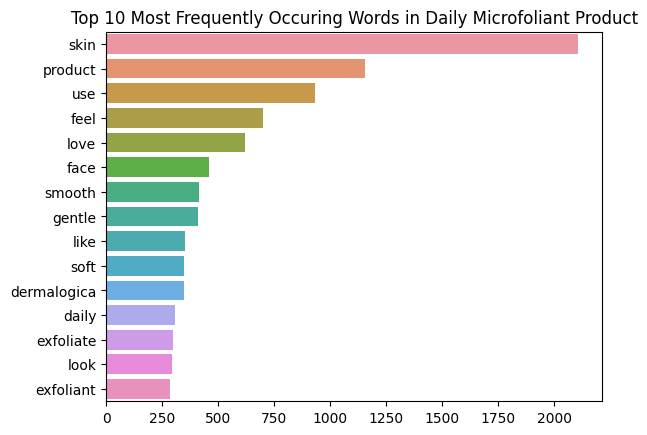

In [40]:
plot_bar_for_products(Daily_Microfoliant, "Daily Microfoliant")

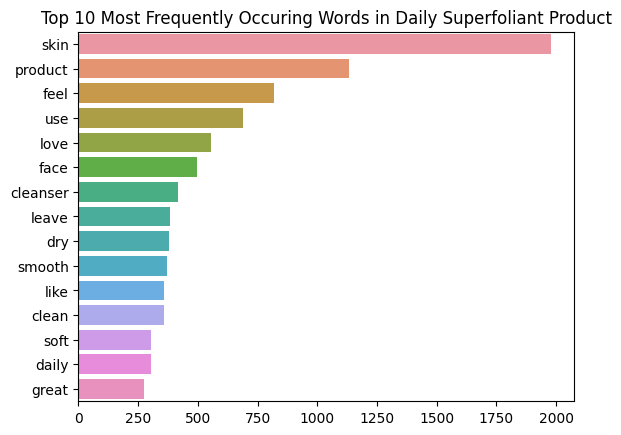

In [41]:
plot_bar_for_products(Daily_Superfoliant, "Daily Superfoliant")

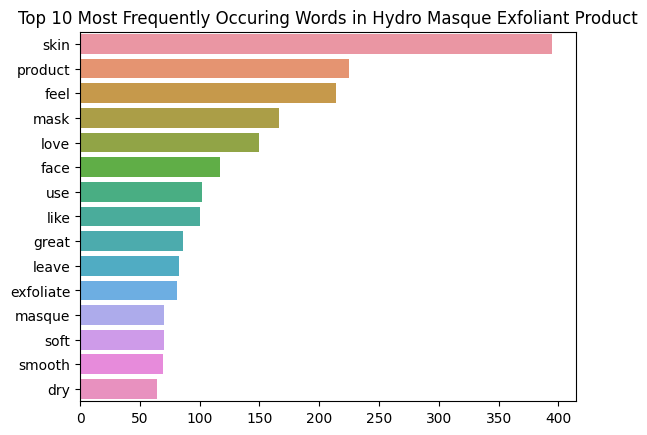

In [42]:
plot_bar_for_products(Hydro_Masque_Exfoliant, "Hydro Masque Exfoliant")

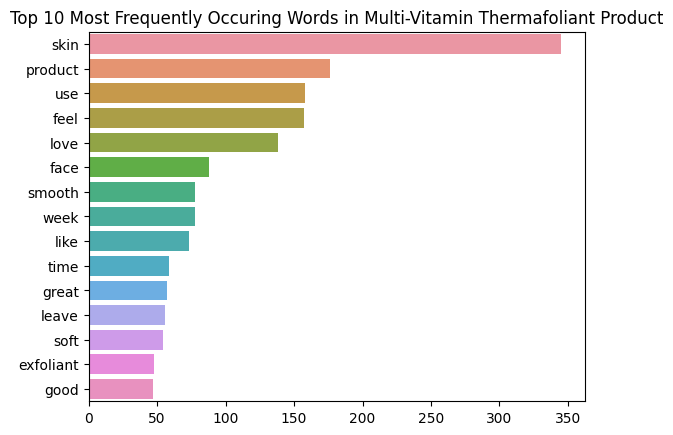

In [43]:
plot_bar_for_products(Multi_Vitamin_Thermafoliant, "Multi-Vitamin Thermafoliant")

**Plot countplots of reviews for each product, by both verified and unverified buyers**

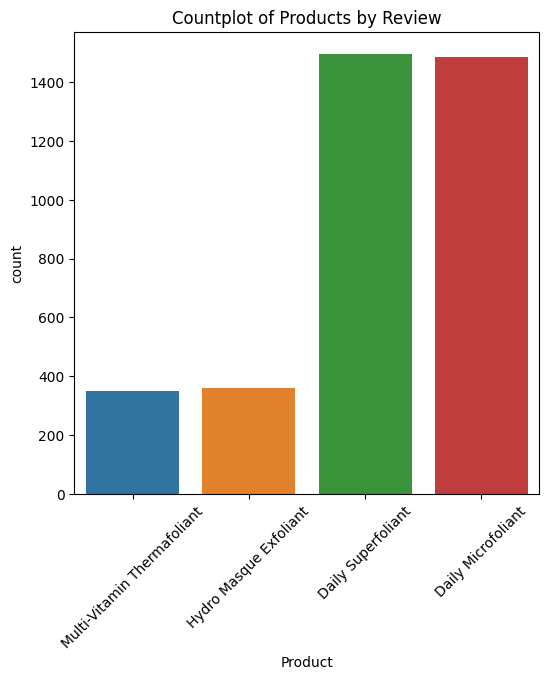

In [44]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df_1['Product'])
plt.xticks(rotation=45)
plt.title('Countplot of Products by Review')
plt.show()

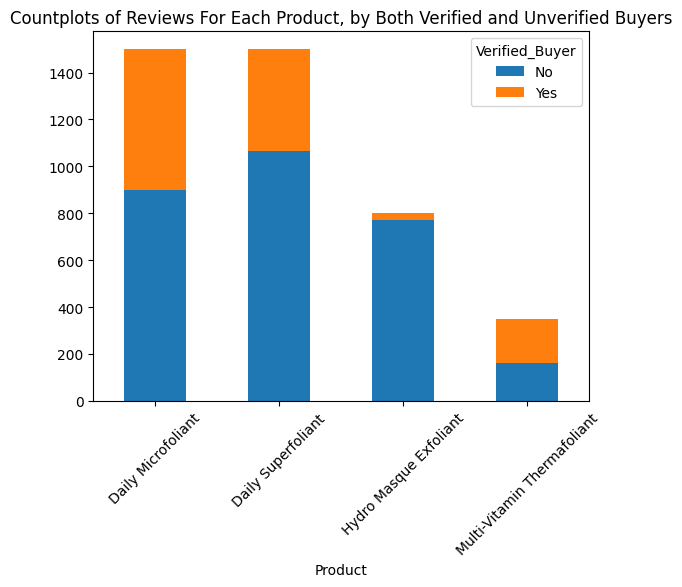

In [45]:
pd.crosstab(df['Product'], df['Verified_Buyer']).plot(kind='bar', stacked=True)
plt.title("Countplots of Reviews For Each Product, by Both Verified and Unverified Buyers")
plt.xticks(rotation=45)
plt.show()

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

**Import Necessary libraries**

In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textwrap import wrap

**Remove words that don't contribute to insights in the wordcloud**

In [47]:
grouped_reviews_df = pd.DataFrame(grouped_reviews)
grouped_reviews_df

,Review_Text
Product,
Daily Microfoliant,recently notice appearance blackhead month normally past try exfoliate product zero change appearance try time notice major difference time try return purchase run buy notice change skin product smell like powder milk product content weight come moisture absorbent packet find inside good scrub tacha rice polish comparable r scrub use use tiny bit mix water scrub leave skin soft ready skincare routine african american natural product lush product address issue like goto beautiful skin come night product great patience purge skip start week ago week skin break bad assumption exfoliate gunk underneath skin barrier week see great result small blemish pore small forehead nose excited skin look like week amazing product struggle acne scar year product diminish away cleanser moisturizer clay mask get product dermalogica change skin life finally feel comfortable skin la roche posay cleanser vitamin c oil wonder skin exfoliator oil week notice huge difference skin dark spot lighten texture ...
Daily Superfoliant,buy whim store great review description say multiple time great remove impurity wash twice ton makeup come toner hydrate guess moderately dry skin yeat long mean cleanser immediately dry expensive product drug store product cleaning balm year feel face get clean twice sit worried go try omg shock go like regular cleanser rub rinse room temp water feel immediately moisturize face feel light airy clean little gord long way value amazing exfoliant incredible gentle use day make skin feel like blank canvas moisturize like esthetician recommend product series chemical peel absolutely love product sensitive combo skin hydration moisture face feel amazing definitely feel remove dirt day highly recommend fellow combo skin peep finally moisturize cleanser clean moisturize expect product clean moisturize time face red blotchy look wash great product spot change essential step daily skincare routine try skin cleanser take cake light weight get job strip skin use precleanse product leave skin ...
Hydro Masque Exfoliant,masque gentle easy use masque feel tend dry break time skin feel hydrated rinse hear good thing exfoliant not wait use second time buy exfoliant love feel make skin feel mask far month need little apply go smoothly combination cream dermalogica cleanser feel difference skin texture bit star sure exfoliate mask week feel exfoliate clean skin keep super hydrate skin look visibly clear bright use not think size last long love good mask definitely feel like smooth soft skin reduce price skin silky soft skin feel great masque soft hydrated skin great product add routine mask exfoliate rough sensitive skin buildup keratin pore mask gently dissolve rough leave skin super smooth hydrated love bead soft dissolve fast rough skin use week improvement skin look feel creamy masque great exfoliant feel subtle exfoliation work need use week good consider price subtle cucumber smell calm love bubble good holy grail love gfiny bubble pop use mask event glow smooth skin receive defective bottle incr...
Multi-Vitamin Thermafoliant,love face shower heat give light scrub nicely well daily microfoliant obsess skin smooth enjoy product look forward feel great try like love apply face little shot warm feel good scrub gritty effect encounter positive one exfoliate nicely give smooth skin irritation reaction skin highly recommend buy love use wet dry control abrasive leave face soft drench vitamin absolutely love truly like multivitamin thermafoliant product year happy purchase directly long available ulta store definitely love skin face feel well excelent love product exfoliate skin help dry winter face use shower twice weekly usually whilst wait conditioner soak andor exfoliate body super sensitive skin prone blotch oily t zone product amazing thing skin hydrate slough dead skin cell cause zero irritation leave skin glow like deep facial not live makeup go smooth great product feel gently exfoliate recommend

In [48]:
Daily_Microfoliant = re.sub('feel|leave|use|face|skin|product', "", grouped_reviews[0])
Daily_Microfoliant

'recently notice appearance blackhead month normally past try exfoliate  zero change appearance try time notice major difference time try return purchase run buy notice change   smell like powder milk  content weight come moisture absorbent packet find inside good scrub tacha rice polish comparable r scrub   tiny bit mix water scrub   soft ready care routine african american natural  lush  address issue like goto beautiful  come night  great patience purge skip start week ago week  break bad assumption exfoliate gunk underneath  barrier week see great result small blemish pore small forehead nose excited  look like week amazing  struggle acne scar year  diminish away cleanser moisturizer clay mask get  dermalogica change  life finally  comfortable  la roche posay cleanser vitamin c oil wonder  exfoliator oil week notice huge difference  dark spot lighten texture  lot smooth love  recently go minivaca san diego sun  dry get home foundation makeup look crack dry   well  day maybe day exf

In [49]:
Daily_Superfoliant = re.sub('feel|leave|use|face|skin|product', "", grouped_reviews[1])
Daily_Superfoliant

'buy whim store great review description say multiple time great remove impurity wash twice ton makeup come toner hydrate guess moderately dry  yeat long mean cleanser immediately dry expensive  drug store  cleaning balm year   get clean twice sit worried go try omg shock go like regular cleanser rub rinse room temp water  immediately moisturize   light airy clean little gord long way value amazing exfoliant incredible gentle  day make   like blank canvas moisturize like esthetician recommend  series chemical peel absolutely love  sensitive combo  hydration moisture   amazing definitely  remove dirt day highly recommend fellow combo  peep finally moisturize cleanser clean moisturize expect  clean moisturize time  red blotchy look wash great  spot change essential step daily care routine try  cleanser take cake light weight get job strip   precleanse    soft supple sensitive fragrance smell clean fresh worth penny great  perfect cleanser dry sensitive   difference immediately  soft like

In [50]:
Hydro_Masque_Exfoliant = re.sub('feel|leave|use|face|skin|product', "", grouped_reviews[2])
Hydro_Masque_Exfoliant

'masque gentle easy  masque  tend dry break time   hydrated rinse hear good thing exfoliant not wait  second time buy exfoliant love  make   mask far month need little apply go smoothly combination cream dermalogica cleanser  difference  texture bit star sure exfoliate mask week  exfoliate clean  keep super hydrate  look visibly clear bright  not think size last long love good mask definitely  like smooth soft  reduce price  silky soft   great masque soft hydrated  great  add routine mask exfoliate rough sensitive  buildup keratin pore mask gently dissolve rough   super smooth hydrated love bead soft dissolve fast rough   week improvement  look  creamy masque great exfoliant  subtle exfoliation work need  week good consider price subtle cucumber smell calm love bubble good holy grail love gfiny bubble pop  mask event glow smooth  receive defective bottle incredibly difficult  eventually decide unscrew cap easy   like lotion exfoliator lather cleanse ing direct result disappointed exfol

In [51]:
Multi_Vitamin_Thermafoliant = re.sub('feel|leave|use|face|skin|product', "", grouped_reviews[3])
Multi_Vitamin_Thermafoliant

'love  shower heat give light scrub nicely well daily microfoliant obsess  smooth enjoy  look forward  great try like love apply  little shot warm  good scrub gritty effect encounter positive one exfoliate nicely give smooth  irritation reaction  highly recommend buy love  wet dry control abrasive   soft drench vitamin absolutely love truly like multivitamin thermafoliant  year happy purchase directly long available ulta store definitely love    well excelent love  exfoliate  help dry winter   shower twice weekly usually whilst wait conditioner soak andor exfoliate body super sensitive  prone blotch oily t zone  amazing thing  hydrate slough dead  cell ca zero irritation   glow like deep facial not live makeup go smooth great   gently exfoliate recommend love dermalogica  fave multivitamin thermofoliant exfoliant   looking renew rejuvenate love follow multivitamin power recovery masque seriously  look like professional facial everytime  look smooth subtle refreshingly clean thermafolia

**Plot Wordcloud for each Product**

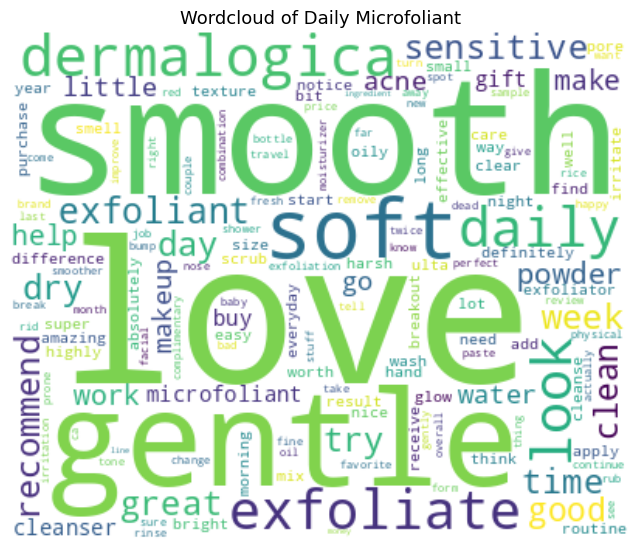

In [52]:
# Function for generating word clouds
def generate_wordcloud(data, product):
  wc = WordCloud(width=400, height=330, max_words=150,collocations=False, background_color="white").generate(data)
  plt.figure(figsize=(8,10))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Wordcloud of {product}", fontsize =13)
  plt.show()
generate_wordcloud(Daily_Microfoliant, "Daily Microfoliant")

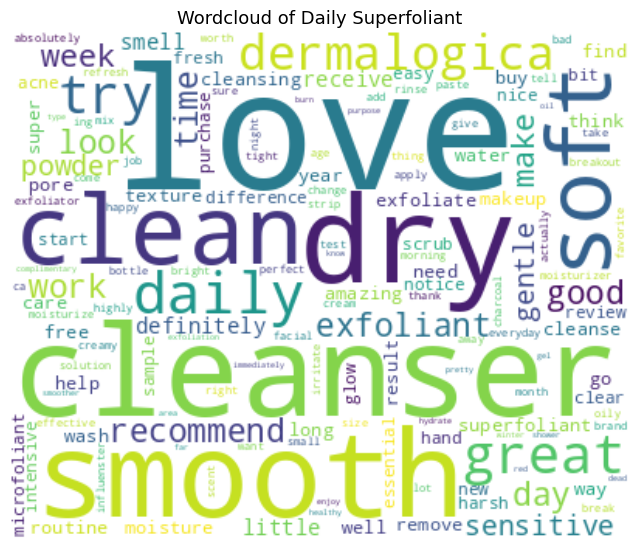

In [53]:
generate_wordcloud(Daily_Superfoliant, "Daily Superfoliant")

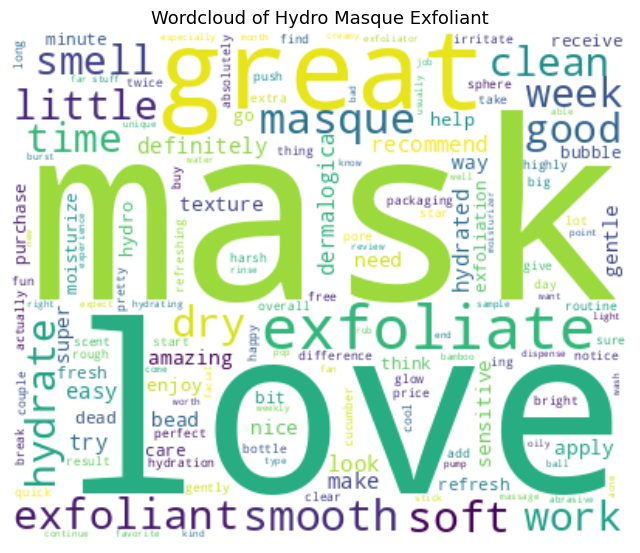

In [54]:
generate_wordcloud(Hydro_Masque_Exfoliant, "Hydro Masque Exfoliant")

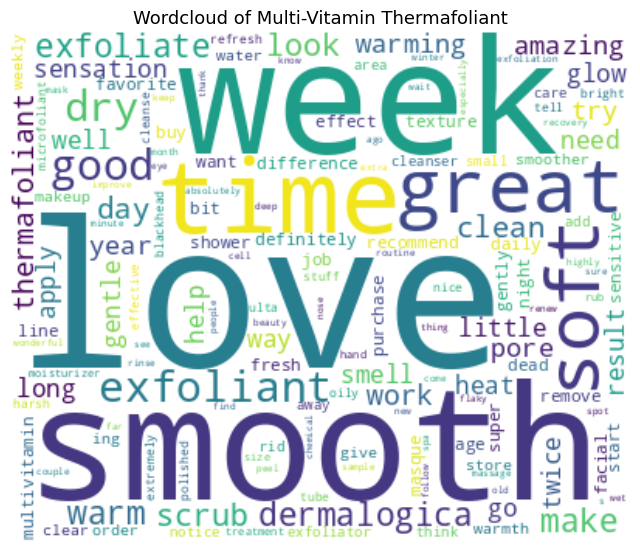

In [55]:
generate_wordcloud(Multi_Vitamin_Thermafoliant, "Multi-Vitamin Thermafoliant")

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

##**Sentiment Analysis**

Sentiment analysis is the practice of using algorithms to classify various samples of related text into overall positive and negative categories. The ultimate goal of sentiment analysis is to decipher the underlying mood, emotion, or sentiment of a text. This is also known as Opinion Mining.

**Using Transformer based models:**

To perform any task using transformers, we first need to import the pipeline function from transformers. Then, an object of the pipeline function is created and the task to be performed is passed as an argument (i.e sentiment analysis in our case). We can also specify the model that we need to use to perform the task. Here, since we have not mentioned the model to be used, the distillery-base-uncased-finetuned-sst-2-English mode is used by default for sentiment analysis.

**Installing transformer and importing pipeline**

In [56]:
! pip install transformers
from transformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.4 MB/s eta 0:00:00


In [57]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [58]:
first = sentiment_pipeline([str(i) for i in df_1['Review_Text']])

In [59]:
first_df = pd.DataFrame(first)
first_df

,label,score
0,POSITIVE,0.999695
1,POSITIVE,0.988692
2,POSITIVE,0.999883
3,POSITIVE,0.996386
4,POSITIVE,0.998662
...,...,...
3686,NEGATIVE,0.997089
3687,NEGATIVE,0.976436
3688,POSITIVE,0.994608
3689,NEGATIVE,0.998870


In [60]:
sentiment_counts = first_df.groupby(['label']).size()
print(sentiment_counts)

label
NEGATIVE    1177
POSITIVE    2514
dtype: int64


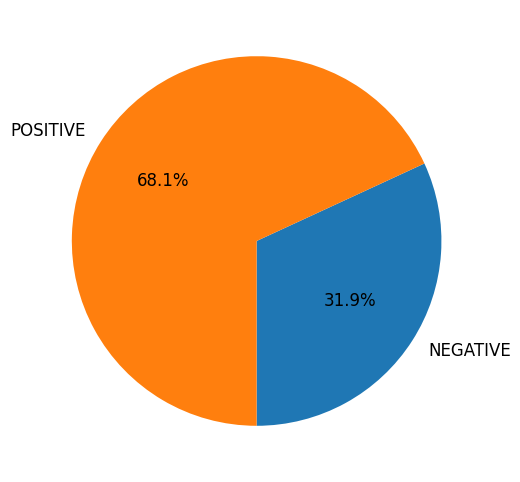

In [61]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
plt.show()

**Grouping the reviews by product, and running a sentiment analysis for the reviews on each product**

In [62]:
product_list = [Daily_Microfoliant, Daily_Superfoliant, Hydro_Masque_Exfoliant, Multi_Vitamin_Thermafoliant]
second = [sentiment_pipeline([str(i) for i in x.split()]) for x in product_list]

In [63]:
second[0]

[{'label': 'POSITIVE', 'score': 0.9928474426269531},
 {'label': 'POSITIVE', 'score': 0.9567110538482666},
 {'label': 'POSITIVE', 'score': 0.9975401163101196},
 {'label': 'NEGATIVE', 'score': 0.9828158020973206},
 {'label': 'POSITIVE', 'score': 0.9749141931533813},
 {'label': 'POSITIVE', 'score': 0.973183274269104},
 {'label': 'NEGATIVE', 'score': 0.9876970648765564},
 {'label': 'NEGATIVE', 'score': 0.7526195645332336},
 {'label': 'POSITIVE', 'score': 0.9229469895362854},
 {'label': 'NEGATIVE', 'score': 0.9995637536048889},
 {'label': 'POSITIVE', 'score': 0.9963359832763672},
 {'label': 'POSITIVE', 'score': 0.9975401163101196},
 {'label': 'NEGATIVE', 'score': 0.7526195645332336},
 {'label': 'POSITIVE', 'score': 0.9580850005149841},
 {'label': 'POSITIVE', 'score': 0.9567110538482666},
 {'label': 'POSITIVE', 'score': 0.9929696917533875},
 {'label': 'POSITIVE', 'score': 0.9988766312599182},
 {'label': 'POSITIVE', 'score': 0.9580850005149841},
 {'label': 'NEGATIVE', 'score': 0.7526195645332

**Visualization for sentiment analysis result on each product**

**Daily_Microfoliant:**

In [64]:
second_df = pd.DataFrame(second[0])
second_df

,label,score
0,POSITIVE,0.992847
1,POSITIVE,0.956711
2,POSITIVE,0.997540
3,NEGATIVE,0.982816
4,POSITIVE,0.974914
...,...,...
26305,POSITIVE,0.997530
26306,POSITIVE,0.999713
26307,POSITIVE,0.941214
26308,POSITIVE,0.977564


In [65]:
sentiment_counts_second_df = second_df.groupby(['label']).size()
print(sentiment_counts_second_df)

label
NEGATIVE     5733
POSITIVE    20577
dtype: int64


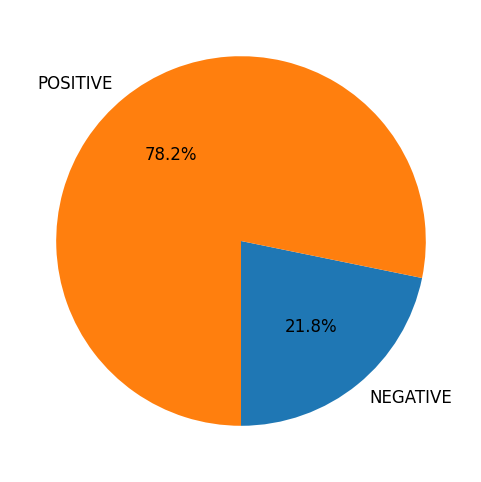

In [66]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_second_df.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
plt.show()

**Daily_Superfoliant:**

In [67]:
second_df1 = pd.DataFrame(second[1])
second_df1

,label,score
0,POSITIVE,0.998695
1,POSITIVE,0.994080
2,NEGATIVE,0.927604
3,POSITIVE,0.999863
4,POSITIVE,0.994689
...,...,...
24583,POSITIVE,0.988726
24584,POSITIVE,0.872520
24585,POSITIVE,0.999874
24586,POSITIVE,0.947502


In [68]:
sentiment_counts_second_df1 = second_df1.groupby(['label']).size()
print(sentiment_counts_second_df1)

label
NEGATIVE     5571
POSITIVE    19017
dtype: int64


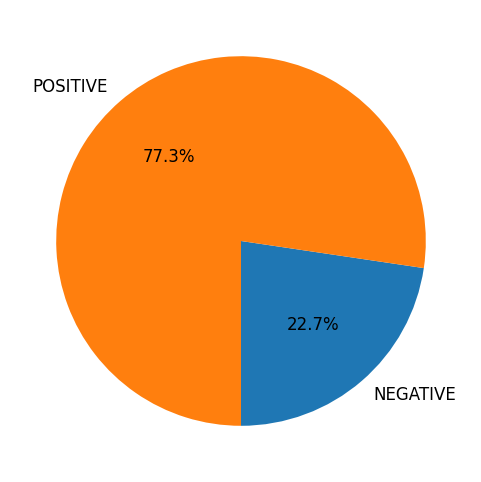

In [69]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_second_df1.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
plt.show()

**Hydro_Masque_Exfoliant:**

In [70]:
second_df2 = pd.DataFrame(second[2])
second_df2

,label,score
0,NEGATIVE,0.990545
1,POSITIVE,0.999820
2,POSITIVE,0.997231
3,NEGATIVE,0.990545
4,POSITIVE,0.594778
...,...,...
5014,POSITIVE,0.999863
5015,POSITIVE,0.999813
5016,POSITIVE,0.999839
5017,POSITIVE,0.999326


In [71]:
sentiment_counts_second_df2 = second_df2.groupby(['label']).size()
print(sentiment_counts_second_df2)

label
NEGATIVE    1176
POSITIVE    3843
dtype: int64


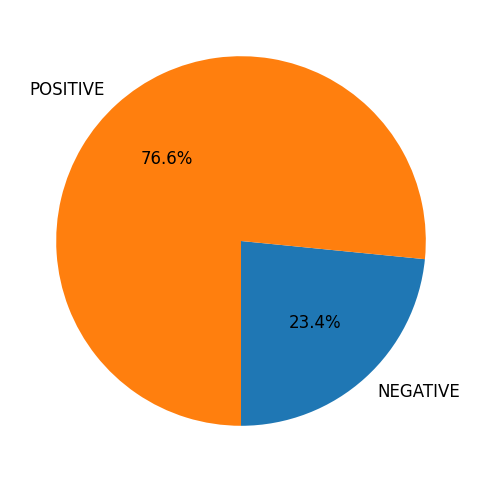

In [72]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_second_df2.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
plt.show()

**Multi_Vitamin_Thermafoliant:**

In [73]:
second_df3 = pd.DataFrame(second[3])
second_df3

,label,score
0,POSITIVE,0.999874
1,POSITIVE,0.990805
2,POSITIVE,0.999369
3,POSITIVE,0.999326
4,POSITIVE,0.999683
...,...,...
3958,NEGATIVE,0.992643
3959,NEGATIVE,0.998020
3960,POSITIVE,0.997901
3961,POSITIVE,0.999816


In [74]:
sentiment_counts_second_df3 = second_df3.groupby(['label']).size()
print(sentiment_counts_second_df3)

label
NEGATIVE     802
POSITIVE    3161
dtype: int64


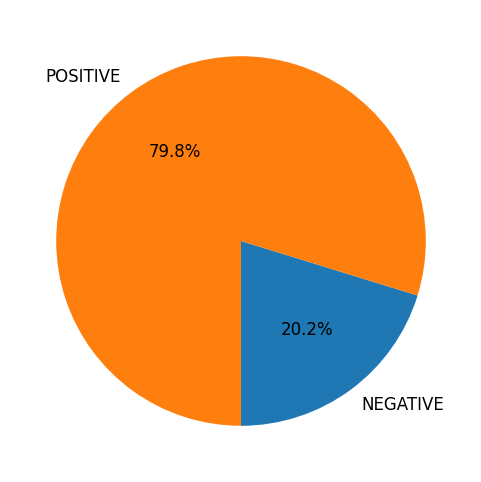

In [75]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_second_df3.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
plt.show()

##**Sentiment Analysis Model**



*   **Load required module**
*   **Identify target** 
* **Split data into train and test set**



In [76]:
from sklearn.model_selection import train_test_split

# Target
TARGET = "label"
TEST_SIZE = 0.1
RANDOM_STATE = 123

X = df_1["Review_Text"]
y = first_df[TARGET]

# Split data
X_train, x_validate, y_train, y_validate = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, x_validate.shape

((3321,), (370,))

**Distribution of Labels**

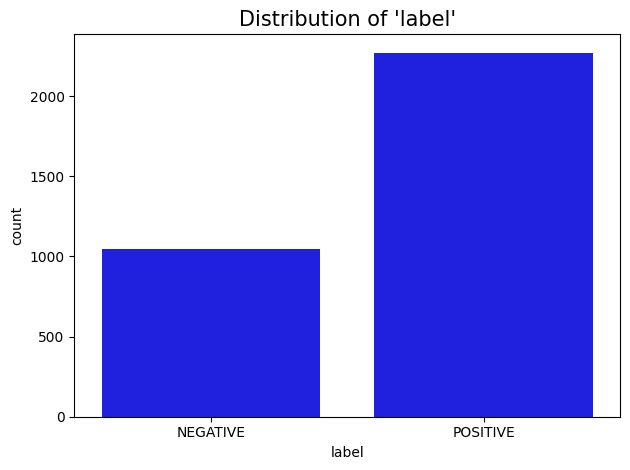

In [77]:
df = pd.concat([X_train, y_train], axis="columns")

# Distribution of the target. It is fairly balanced.
sns.countplot(x=TARGET, data=df, color="b")
plt.title(f"Distribution of {TARGET!r}", size=15)
plt.tight_layout()
plt.show()

#### Comment:

- Check the distribution of the target. This is done inorder to determine whether the labels are imbalanced or not.
- If the labels are imbalanced, e.g if a class has ~98% of the labels, it means that a model accuracy of 98% is **NOT useful** and another metric like **roc_auc score** should be used.

**Preprocessing the text**


> Using the countvectorizer from sklearn.feature_extraction.text module, to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation.



In [78]:
# Preprocess the text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


vectorizer = CountVectorizer()

# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)

X_tr  # Sparse matrix is used because most of the values in the vector are 0s

<3321x3928 sparse matrix of type '<class 'numpy.int64'>'
	with 57493 stored elements in Compressed Sparse Row format>

#### Multi-Nomial Naive Bayes

- The multinomial Naive Bayes classifier is suitable for **classification with discrete features** (e.g., word counts for text classification). 
- Typically, **integer feature values** are required by the multinomial distribution. However, in actuality, **fractional numbers** like **tf-idf** might also be effective.

In [81]:
nb_model = MultinomialNB()

nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Train accuracy: 0.876
Test accuracy: 0.770
